# ML and DL Based LLM-Human Generated Text Classification

#### Harun Harman- 2200765008
#### Mehmet Eren Soykök- 22007650013

This file is for model development and analysis of the models.

### Importing Libraries

In [78]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np

### Load Processed Data

In [79]:
df = pd.read_csv("D:/AIN423 PROJECT/data.csv")
df.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,label
0,0,-0.533722,0.222507,-0.323428,-0.273328,-0.062198,-0.014624,-0.195213,-0.583112,-0.229923,...,-0.315727,0.099374,0.140888,-0.058920,-0.279886,-0.317945,0.124791,0.038991,-0.138685,1
1,1,-0.532804,0.220208,-0.326513,-0.266211,-0.066736,-0.016124,-0.194383,-0.574867,-0.228622,...,-0.312350,0.098560,0.141333,-0.064585,-0.277356,-0.316617,0.123344,0.038503,-0.137380,1
2,2,-0.523694,0.218362,-0.323598,-0.267960,-0.067878,-0.016461,-0.195799,-0.576141,-0.232405,...,-0.310891,0.096621,0.137220,-0.060069,-0.277939,-0.316568,0.116972,0.040335,-0.133009,1
3,3,-0.530124,0.221870,-0.325840,-0.271962,-0.068434,-0.017566,-0.197119,-0.585294,-0.228060,...,-0.313264,0.096316,0.136458,-0.063324,-0.279471,-0.317912,0.121894,0.041742,-0.139644,1
4,4,-0.528554,0.222879,-0.326083,-0.272244,-0.060641,-0.018174,-0.193359,-0.579500,-0.229618,...,-0.310771,0.098044,0.139052,-0.063586,-0.279075,-0.317482,0.121424,0.040697,-0.133495,1


### Train-Test Split

In [8]:
# Split dataset into features (embeddings) and target labels
X = final_df.drop('label', axis=1)
y = final_df['label']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic Regression 

In [43]:
# Initialize and train the model
model = LogisticRegression( random_state = 42)
model.fit(X_train, y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [44]:
# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     26577
           1       0.85      0.70      0.77     11144

    accuracy                           0.88     37721
   macro avg       0.87      0.83      0.84     37721
weighted avg       0.87      0.88      0.87     37721



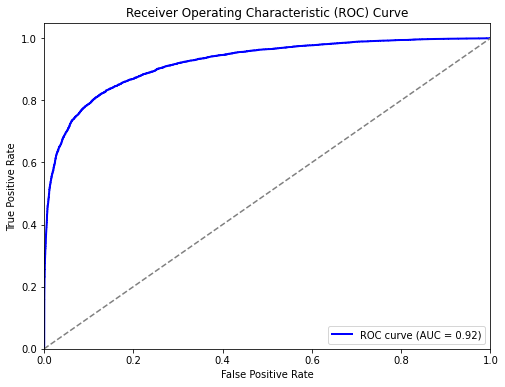

In [45]:
def plot_auc(model, X_test,y_test):
    y_pred_probs = model.predict_proba(X_test)[:, 1]

    # Calculate the false positive rate (fpr) and true positive rate (tpr) for different threshold values
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
plot_auc(model,X_test,y_test)

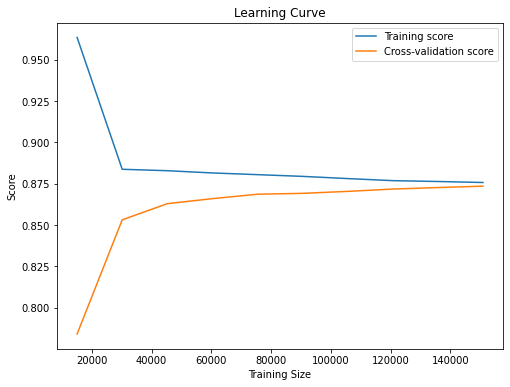

In [46]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model,X,y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()
plot_learning_curve(model,X,y)

* Above plot shows us that the model has the generalization ability. Because the score of both training and cv score are eventually have similar value.

* On the other hand after training size = 80k, no significant change occurs. That means the model has reached the data limit.

In [38]:
import joblib

# Specify the path where you want to save the model
model_path = 'D:/AIN423 PROJECT/lr_model.pkl'

# Save the model to the specified path
joblib.dump(model, model_path)

['D:/AIN423 PROJECT/lr_model.pkl']

### XGBOOST Classifer

In [54]:
import xgboost as xgb
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
}

# XGBClassifier modeli oluşturun
xgb_model = xgb.XGBClassifier(random_state=42)

# GridSearchCV oluşturun
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# GridSearchCV'yi eğitin
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve en iyi skoru yazdırın
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# En iyi modeli seçin
best_model = grid_search.best_estimator_

Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Best score: 0.9905156415694591


In [67]:
import xgboost as xgb

params = {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [68]:
# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26577
           1       0.94      0.86      0.90     11144

    accuracy                           0.94     37721
   macro avg       0.94      0.92      0.93     37721
weighted avg       0.94      0.94      0.94     37721



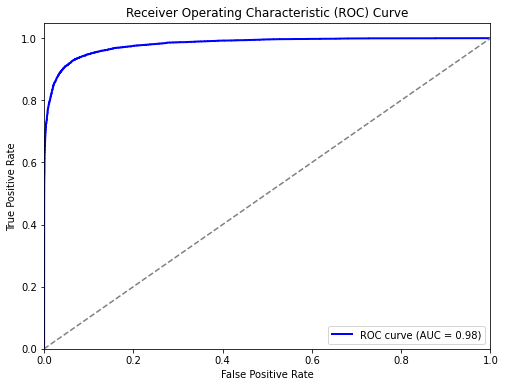

In [70]:
plot_auc(model,X_test,y_test)

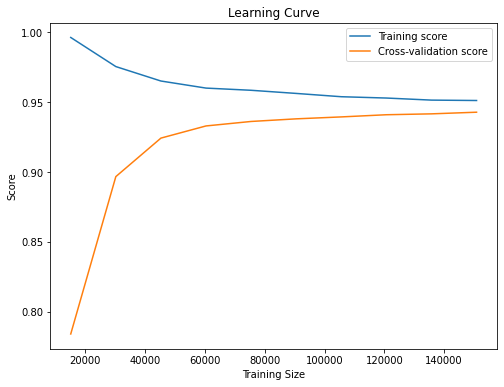

In [71]:
plot_learning_curve(model,X,y)

In [72]:
# Specify the path where you want to save the model
model_path = 'D:/AIN423 PROJECT/xgb_model.pkl'

# Save the model to the specified path
joblib.dump(model, model_path)

['D:/AIN423 PROJECT/xgb_model.pkl']

### Random Forest Classifier

In [73]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
# Predict on testing set
y_pred = model.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     26577
           1       0.94      0.86      0.90     11144

    accuracy                           0.94     37721
   macro avg       0.94      0.92      0.93     37721
weighted avg       0.94      0.94      0.94     37721



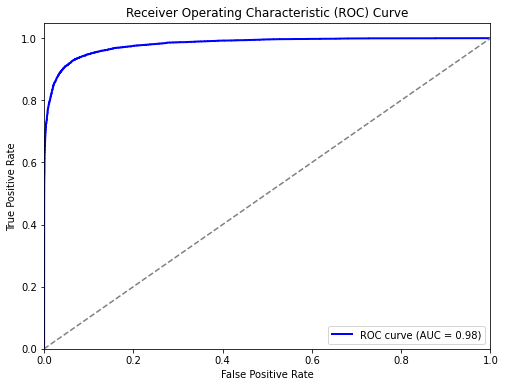

In [75]:
plot_auc(model,X_test,y_test)

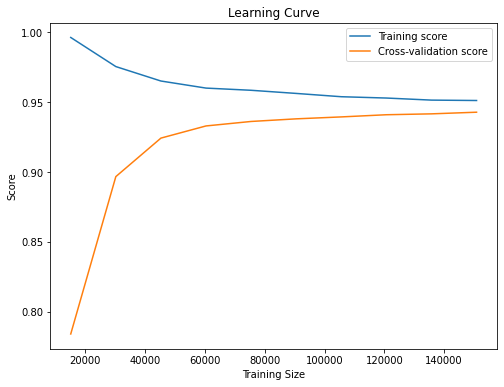

In [77]:
plot_learning_curve(model,X,y)

In [76]:
# Specify the path where you want to save the model
model_path = 'D:/AIN423 PROJECT/rf_model.pkl'

# Save the model to the specified path
joblib.dump(model, model_path)

['D:/AIN423 PROJECT/rf_model.pkl']

**Disclaimer!** <font color='grey'>This notebook was prepared by <Harun Harman and Mehmet Eren Soykök> as a term project for the *AIN423 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>